In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank.csv' ,sep=";",      # separator
                 quotechar='"' )           # values wrapped in quotes
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1498,51,blue-collar,divorced,primary,no,837,no,no,telephone,30,jul,41,2,-1,0,unknown,no
715,30,admin.,single,secondary,no,-635,no,no,cellular,25,jul,250,1,-1,0,unknown,no
3701,51,management,married,tertiary,no,5108,yes,no,cellular,8,oct,272,1,102,8,other,no
2276,42,blue-collar,married,primary,no,704,yes,yes,telephone,31,jul,88,10,-1,0,unknown,no
3853,54,technician,married,secondary,no,-315,no,yes,cellular,10,jul,2029,1,-1,0,unknown,yes


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
# See unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

age: [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]

job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital: ['married' 'single' 'divorced']

education: ['primary' 'secondary' 'tertiary' 'unknown']

default: ['no' 'yes']

balance: [ 1787  4789  1350 ...  -333 -3313  1137]

housing: ['no' 'yes']

loan: ['no' 'yes']

contact: ['cellular' 'unknown' 'telephone']

day: [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]

month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

duration: [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  354

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Variable Classification for EDA ##  
1. Numerical Variables (int64)
Use: mean, median, std, histograms, boxplots, correlations, outlier detection.
Numerical columns: age, balance, day, duration, campaign, pdays, previous
2. Categorical Variables (object)
Use: value_counts(), proportions, bar plots, cross-tabs, chi-square, etc.
Categorical columns: job, marital, education, default ,housing, loan, contact, month, poutcome, y (target)
## Notes (important for cleaning) ##
1. pdays = -1 should be treated as a special category: “client has not been previously contacted”
2. poutcome and contact contain 'unknown' → treat as a valid category.
3. month is categorical, not numerical.
4. y should be encoded as a binary target later (yes → 1, no → 0).

## To ensure correct analysis, we convert categorical variables to category dtype.

In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

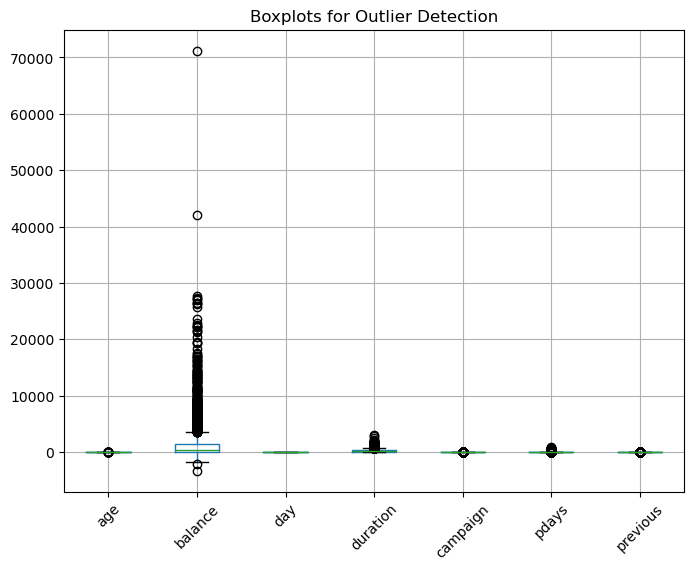

In [17]:
# Boxplots (best for outliers)
plt.figure(figsize = (8,6))
df.boxplot()
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


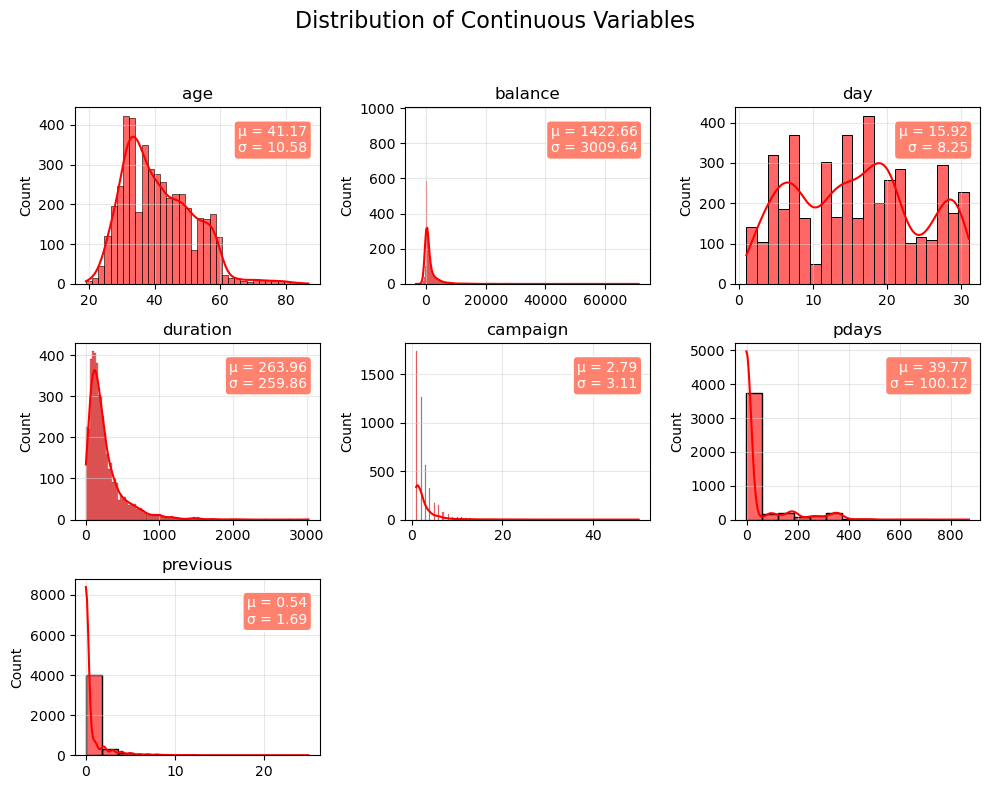

In [19]:
continuous_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Select continuous features
data_continuous = df[continuous_features]

# Create subplots dynamically
n_cols = 3
n_rows = int(np.ceil(len(data_continuous.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))

axes = axes.flatten()  # Flatten so you can loop easily

for i, col in enumerate(data_continuous.columns):
    ax = axes[i]
    col_data = data_continuous[col].dropna()

    # Plot histogram with KDE
    sns.histplot(col_data, bins='auto', kde=True, color='red', alpha=0.6, ax=ax)

    # Axis labels and grid
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, color='lightgrey', alpha=0.5)

    # Show mean and std inside plot
    mean, std = col_data.mean(), col_data.std()
    textstr = f'μ = {mean:.2f}\nσ = {std:.2f}'
    ax.text(0.95, 0.9, textstr, transform=ax.transAxes, fontsize=10,
            color='white', ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white'))

# Turn off unused axes (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribution of Continuous Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 1. age
Looks normally distributed, slight right skew.
Mean ≈ 41 years.
No extreme outliers.(standardize later for ML models)
## 2. balance
Very heavy right tail.
Many customers have small balances, but a few have extremely high values.
Outliers are present but realistic (not errors).
--> Apply log transformation if needed for models requiring normality: df['balance_log'] = np.log1p(df['balance'])
## 3. day
Uniform distribution across days (1–31).
No statistical meaning; this variable does not help predict customer decisions.
--> dropping day because: It is random. It does not represent meaningful customer behavior.
## 4. duration
Strong right skew.
Many short calls, few extremely long calls.
Important variable in the original dataset (call duration directly influences outcome).
Do NOT remove outliers; duration is important.
--> Standardize for ML. (log-transform)
## 5. campaign
Mostly small numbers (few contacts), but long tail.
Outliers represent clients contacted many times.
## 6. pdays
Extremely skewed.
Majority have pdays = -1, meaning never contacted before.
The positive values show time since last contact for a few customers.
This is the correct handling:
df['pdays_was_contacted'] = (df['pdays'] != -1).astype(int)
Then, either: I keep pdays as numeric or replace -1 with NaN or a separate category
## 7. previous
Almost all customers have 0 previous contacts.
Few have many previous contacts (skewed).
What you should do
Keep as is.
Skew is expected.
Overall Interpretation (Very Important)

The dataset is naturally skewed. This is normal for marketing/banking data.
Call duration, balance, campaign, previous, pdays always have long tails.
should NOT delete outliers because they are valid customer behavior.

In [22]:
for i in ('balance', 'duration', 'campaign'):
    df[i] = np.log1p(df[i])

df

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,7.488853,no,no,cellular,19,oct,4.382027,0.693147,-1,0,unknown,no
1,33,services,married,secondary,no,8.474286,yes,yes,cellular,11,may,5.398163,0.693147,339,4,failure,no
2,35,management,single,tertiary,no,7.208600,yes,no,cellular,16,apr,5.225747,0.693147,330,1,failure,no
3,30,management,married,tertiary,no,7.297768,yes,yes,unknown,3,jun,5.298317,1.609438,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.000000,yes,no,unknown,5,may,5.424950,0.693147,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,NaN,yes,no,cellular,30,jul,5.799093,1.791759,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,NaN,yes,yes,unknown,9,may,5.036953,0.693147,-1,0,unknown,no
4518,57,technician,married,secondary,no,5.690359,no,no,cellular,19,aug,5.023881,2.484907,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,7.037028,no,no,cellular,6,feb,4.867534,1.609438,211,3,other,no


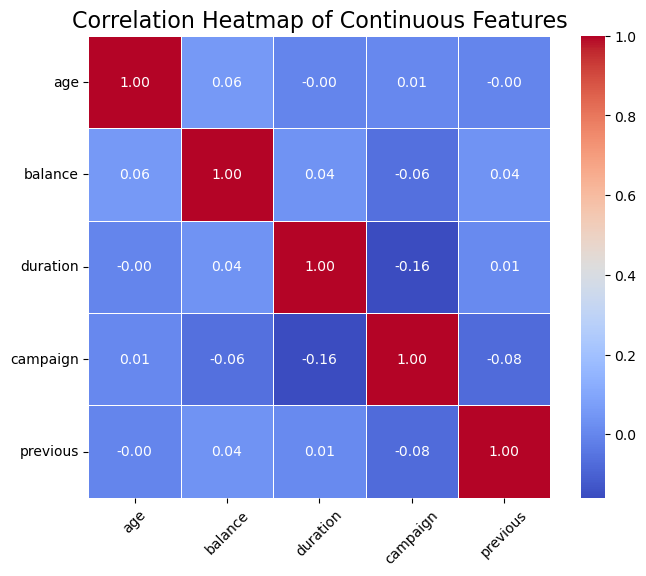

In [26]:
#correlation matrix
con_fea = ['age', 'balance', 'duration', 'campaign', 'previous']

df_con = df[con_fea]

corr_matrix = df_con.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, 
            annot=True,        # Show correlation values
            fmt=".2f",         # 2 decimal places
            cmap='coolwarm',   # Color palette
            cbar=True,         # Show color bar
            square=True,       # Make squares
            linewidths=0.5)    # Lines between cells

plt.title('Correlation Heatmap of Continuous Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [24]:
df.drop(columns=['day'], inplace=True)

In [28]:
float_col = ['age',  'balance', 'duration', 'campaign', 'previous']
outliers = pd.DataFrame()

for i in float_col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    median_val = df[i].median()

    # Replace outliers
    df[i] = df[i].apply(
        lambda x: median_val if (x < lower or x > upper) else x
    )


In [32]:
def pdays_category(x):
    if x == -1:
        return "never"
    elif x <= 150:
        return "recent"
    else:
        return "long_ago"

df['pdays_cat'] = df['pdays'].apply(pdays_category)


In [36]:
df.drop(columns =['pdays'], inplace = True)

In [38]:
# Categorical columns
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'pdays_cat', 'y']

for col in categorical_col:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   float64 
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4160 non-null   float64 
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   month      4521 non-null   category
 10  duration   4521 non-null   float64 
 11  campaign   4521 non-null   float64 
 12  previous   4521 non-null   float64 
 13  poutcome   4521 non-null   category
 14  y          4521 non-null   category
 15  pdays_cat  4521 non-null   category
dtypes: category(11), float64(5)
memory usage: 227.3 KB


In [40]:
df[categorical_col]

,job,marital,education,default,housing,loan,contact,month,poutcome,pdays_cat,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,never,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,long_ago,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,long_ago,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,never,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,never,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,never,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,never,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,never,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,long_ago,no


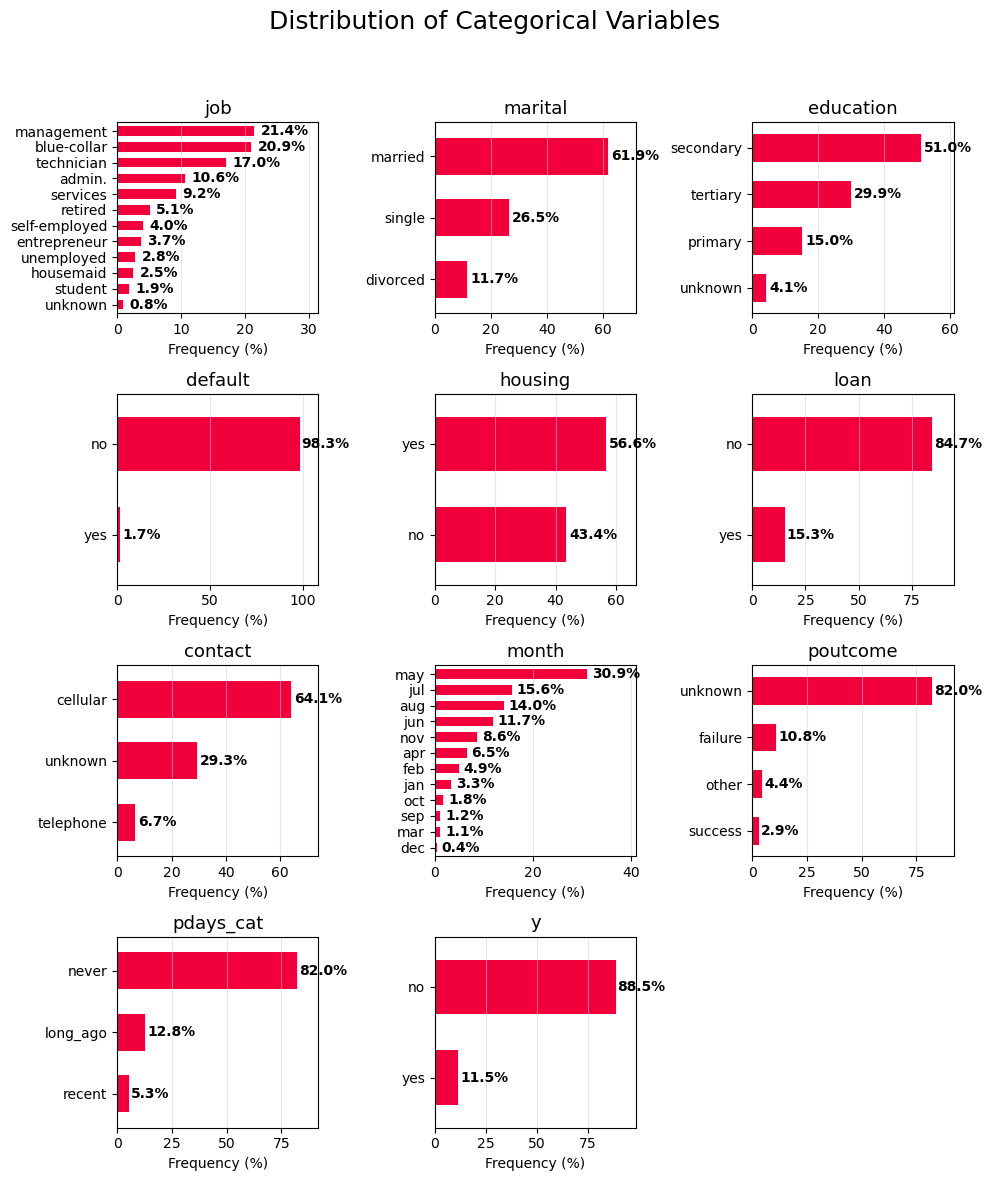

In [42]:
df_categorical = df[categorical_col]

n_col = 4
n_row = n_rows = int(np.ceil(len(categorical_col) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize = (10, n_rows *3))
axes = axes.flatten()

# Loop over categorical columns
for i, col in enumerate(categorical_col):
    ax = axes[i]
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot horizontal bar chart
    value_counts.plot(kind='barh', ax=ax, color='#F2003C', width=0.6)

    # Add percentage labels
    for index, value in enumerate(value_counts):
        ax.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=10, fontweight='bold')

    ax.set_xlim(0, value_counts.max() + 10)
    ax.set_title(col, fontsize=13)
    ax.set_xlabel('Frequency (%)')
    ax.set_ylabel('')
    ax.grid(axis='x', color='lightgrey', alpha=0.5)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Key Conclusions from the Categorical Variable Distribution
1. Target Variable (y) – Strong Class Imbalance
88.5% = no, 11.5% = yes

2. Job Category – Concentrated in a Few Jobs
Most common jobs:
Management (21.4%), Blue-collar (20.9%), Technician (17%)
Less common:
Students, unemployed, unknown (very small)
Implication:
Some job classes are too small and may need combining.

3. Marital Status – Mostly Married
Married (61.9%)
Single (26.5%)
Divorced (11.7%)

4. Education – Dominated by Secondary
Secondary (51%)
Tertiary (29.9%)
Primary (15%)
Unknown (4%)
Implication:
Education levels are reasonably balanced except "unknown," which may need separate handling.

5. Default – Almost Always “no”
No = 98.3%
Yes = 1.7%
Conclusion:
This variable has almost no predictive power. --> drop it

7. Housing Loan
Yes = 56.6%
No = 43.4%
Balanced enough.

8. Personal Loan
No = 84.7%
Yes = 15.3%
Slight imbalance.

10. Contact Type – Cellular Dominates
Cellular = 64.1%
Unknown = 29.3%
Telephone = 6.7%
Implication:
A large portion is “unknown.” This should not be dropped, because “unknown contact” might correlate strongly with not subscribing.

12. Month – Campaign Mostly in May and July
Top months:
May = 30.9%
July = 15.6%
Bottom months:
December, March, October almost zero.
Implication:
The dataset is seasonal. Campaign activity is not evenly distributed across months, which will influence the target variable.

14. Previous Outcome (poutcome) – Mostly Unknown
Unknown (82%)
Failure (10.8%)
Other (4.4%)
Success (2.9%)
Conclusion:
Most customers were not part of previous campaigns.
But even though “success” is small, it often has a strong positive relationship with the target.


In [46]:
categorical_features = [feature for feature in categorical_col if feature != 'y']

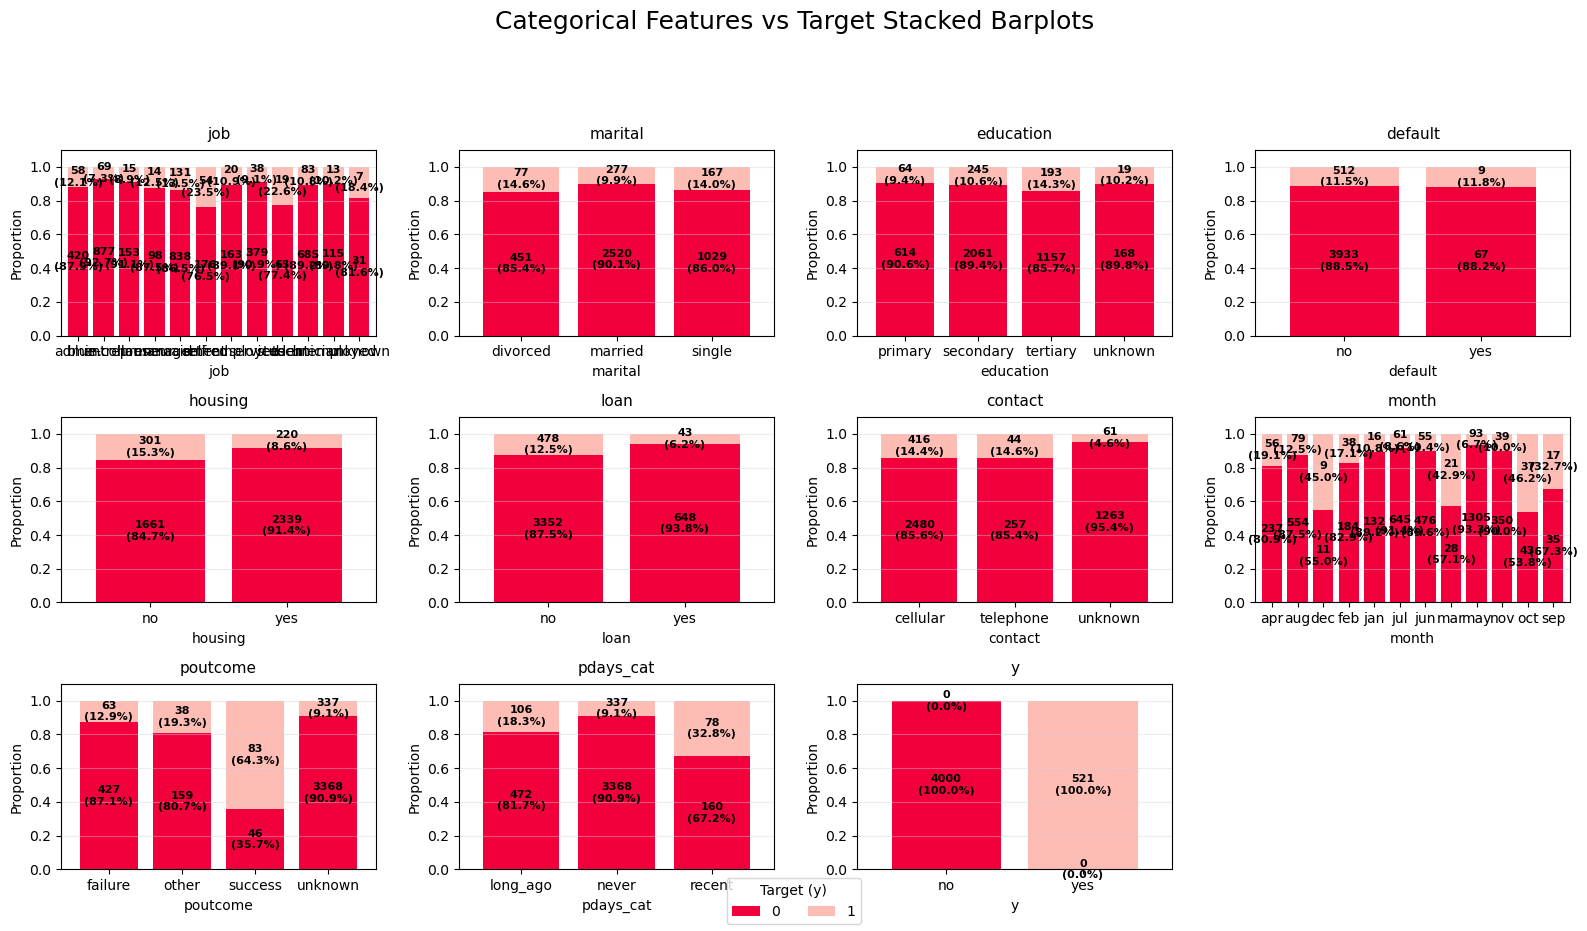

In [48]:
from matplotlib.colors import ListedColormap

# Define color palette and layout
cmp = ListedColormap(['#F2003C', '#FDBCB4'])
n_cols = 4
n_rows = int(np.ceil(len(categorical_col) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(categorical_col):
    ax = axes[i]
    
    # Cross tab: counts and proportions
    cross_tab = pd.crosstab(index=df[col], columns=df['y'])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['y'], normalize='index')

    # Plot normalized stacked bars
    cross_tab_prop.plot(kind='bar', stacked=True, width=0.8, colormap=cmp,
                        ax=ax, legend=False, ylabel='Proportion')

    # Add count and % labels
    for idx, cat in enumerate(cross_tab.index):
        cumulative = 0
        for c_val in cross_tab.columns:
            proportion = cross_tab_prop.loc[cat, c_val]
            count = cross_tab.loc[cat, c_val]
            ax.text(idx, cumulative + proportion / 2, f'{count}\n({proportion*100:.1f}%)',
                    ha='center', va='center', fontsize=8, fontweight='bold', color='black')
            cumulative += proportion

    # Style adjustments
    ax.set_title(col, fontsize=11, pad=8)
    ax.set_ylim(0, 1.1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(axis='y', color='lightgrey', alpha=0.4)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add legend once at the bottom
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['0', '1'], title='Target (y)', loc='lower center', ncol=2, fontsize=10)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Interpretation of Stacked Barplots**

These stacked barplots show **how the probability of subscribing (y = 1)** varies across different categorical groups.

---

# **1. Strong class imbalance visible across all categories**

The response rate is **low overall (~11%). Dataset needs to handle **class imbalance** before modeling.

---

# **2. Job – Some jobs show higher success rates**

Jobs with a higher proportion of **y = 1** (lighter bar):

* **Student**
* **Retired**
* **Unemployed**
* **Entrepreneur**

Jobs with lowest conversion:

* **Management**
* **Blue-collar**
* **Technician**
* **Admin**

---

# **3. Marital status – Singles convert more**

* **Single:** highest share of y=1
* **Married:** lowest
* **Divorced:** middle

---

# **4. Education – Higher education increases conversion**

Subscription probability:

* **Tertiary → highest**
* **Secondary → middle**
* **Primary → lowest**

---

# **5. Default – No predictive power**

Both “yes” and “no” have nearly identical proportions. This feature is **useless** for prediction and can be removed.

---

# **6. Housing Loan – People without housing loan convert more**

* **No housing loan → higher y=1**
* **Yes → lower y=1**

---

# **7. Personal Loan – No personal loan → slightly higher conversion**

similar to housing loan.

---

# **8. Contact Type – Cellular gives highest conversion**

* **Cellular → best response**
* **Unknown → lowest**
* **Telephone → almost same low**

---

# **9. Month – Large differences**

Months with higher conversion rates:

* **March**
* **September**
* **October**

---

# **10. Previous Outcome (poutcome) – Very strong predictor**

Success rate (y=1 proportion):

* **Success → very high**
* **Other → moderate**
* **Failure → low**
* **Unknown → lowest**


In [51]:
# Job
# group rare jobs
job_freq = df['job'].value_counts(normalize=True)
rare_jobs = job_freq[job_freq < 0.03].index  # <3% of data
df['job'] = df['job'].replace(dict.fromkeys(rare_jobs, 'other'))

/var/folders/8v/j04s7d697pbchpncxsv_q5zw0000gn/T/ipykernel_2317/345702316.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['job'] = df['job'].replace(dict.fromkeys(rare_jobs, 'other'))


In [53]:
df = df.drop(columns=['default'])

In [55]:
high = ['mar', 'sep', 'oct', 'nov']
medium = ['apr', 'may', 'jun', 'jul', 'jan']
low = ['aug', 'dec']

def group_month(m):
    if m in high:
        return 'high_season'
    elif m in medium:
        return 'medium_season'
    else:
        return 'low_season'

df['month_group'] = df['month'].apply(group_month)


In [57]:
# Binary yes/no → 0/1
bin_map = {'no': 0, 'yes': 1}
for i in ('housing', 'loan', 'y'):
    df[i] = df[i].map(bin_map)

In [59]:
# Set remaining categoricals
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'pdays_cat']

df_model = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

In [61]:
df_model

,age,balance,housing,loan,duration,campaign,previous,y,month_group,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,pdays_cat_never,pdays_cat_recent
0,30.0,7.488853,0,0,4.382027,0.693147,0.0,0,high_season,0,...,0,0,0,1,0,0,0,1,1,0
1,33.0,8.474286,1,1,5.398163,0.693147,0.0,0,medium_season,0,...,0,1,0,0,0,0,0,0,0,0
2,35.0,7.208600,1,0,5.225747,0.693147,0.0,0,medium_season,0,...,0,0,0,0,0,0,0,0,0,0
3,30.0,7.297768,1,1,5.298317,1.609438,0.0,0,medium_season,0,...,0,0,0,0,0,0,0,1,1,0
4,59.0,6.295266,1,0,5.424950,0.693147,0.0,0,medium_season,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,NaN,1,0,5.799093,1.791759,0.0,0,medium_season,0,...,0,0,0,0,0,0,0,1,1,0
4517,57.0,NaN,1,1,5.036953,0.693147,0.0,0,medium_season,0,...,0,1,0,0,0,0,0,1,1,0
4518,57.0,5.690359,0,0,5.023881,1.098612,0.0,0,low_season,0,...,0,0,0,0,0,0,0,1,1,0
4519,28.0,7.037028,0,0,4.867534,1.609438,0.0,0,low_season,1,...,0,0,0,0,0,1,0,0,0,0
